In [12]:
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pylab as plt
%matplotlib inline
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [87]:
path = 'Sale.csv'
data = pd.read_csv(path)

In [88]:
data['Month'] = pd.to_datetime(data['Month'])

In [89]:
data_month = data

In [90]:
data_month

,Month,Sales
0,2016-01-01,18542.4910
1,2016-02-01,22978.8150
2,2016-03-01,51715.8750
3,2016-04-01,38750.0390
4,2016-05-01,56987.7280
5,2016-06-01,40344.5340
6,2016-07-01,39261.9630
7,2016-08-01,31115.3743
8,2016-09-01,73410.0249
9,2016-10-01,59687.7450


<AxesSubplot:xlabel='Month'>

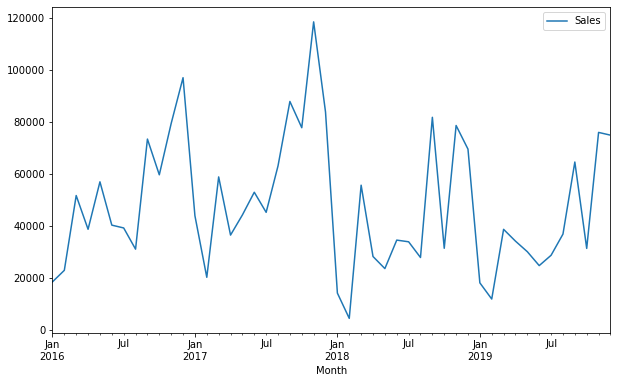

In [95]:
data_month.plot(x='Month', y='Sales')

In [98]:
decomposition = sm.tsa.seasonal_decompose(data_month['Sales'],model='additive', freq=12)

<ipython-input-98-4047116cd6a6>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(data_month['Sales'],model='additive', freq=12)


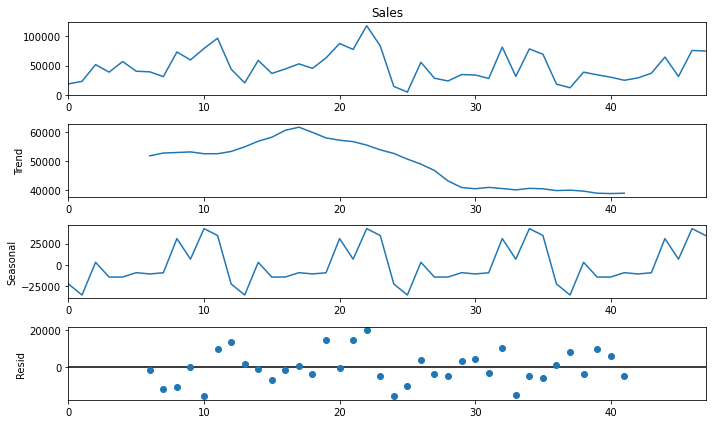

In [99]:
fig = decomposition.plot()
plt.show()

In [54]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(data_month['Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -4.637303
p-value                         0.000110
#Lags Used                      0.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [55]:
#Chia train test

In [56]:
# train_start, train_end = '2016-01', '2019-05'
# test_start, test_end = '2019-06', '2019-12'
# train_month = data_month[train_start:train_end]["Sales"].dropna()
# test_month = data_month['Sales'][test_start:test_end].dropna()
train_month = data_month['Sales'][:-7]
test_month = data_month['Sales'][-7:]

In [57]:
test_month

41    24797.2920
42    28765.3250
43    36898.3322
44    64595.9180
45    31404.9235
46    75972.5635
47    74919.5212
Name: Sales, dtype: float64

In [58]:
# Model

In [59]:
model_sarima_month = auto_arima(train_month, start_p=0, start_q=0,
                               max_p=7, max_q=7, m=12,
                               start_P=0, seasonal = True,
                               d=0, D=0, trace=True,
                               error_action='ignore',
                               suppress_warmings=True,
                               stepwise=True)
print(model_sarima_month.aic())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=944.072, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=952.494, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=942.862, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=941.952, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1012.184, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=948.629, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=943.882, Time=0.10 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=941.736, Time=0.09 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=943.729, Time=0.07 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=944.052, Time=0.05 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=942.667, Time=0.10 sec
 ARIMA(0,0,2)(0,0,2)[12] intercept   : AIC=943.990, Time=0.10 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=939.775, Time=0.07 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=940.340, Time=0.05 sec
 ARIMA(1,0,0)(1,0,2)[12] interce

In [60]:
model_sarima_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   41
Model:             SARIMAX(1, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -464.888
Date:                                 Fri, 04 Jun 2021   AIC                            939.775
Time:                                         01:29:42   BIC                            948.343
Sample:                                              0   HQIC                           942.895
                                                  - 41                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.134e+04   1.72e+04      1.825      0.068   -2324.313     6.5e+04
ar.L1          0.3402      0.304      1.120      0.263      -0.255       0.936
ma.S.L12       0.4932      0.383      1.287      0.198      -0.258       1.244
ma.S.L24       0.3336      0.538      0.621      0.535      -0.720       1.387
sigma2      5.628e+08      0.077   7.35e+09      0.000    5.63e+08    5.63e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.39
Prob(Q):                              0.60   Prob(JB):                         0.50
Heteroskedasticity (H):               0.79   Skew:                             0.45
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.35e+27. Standard errors may be unstable.
"""

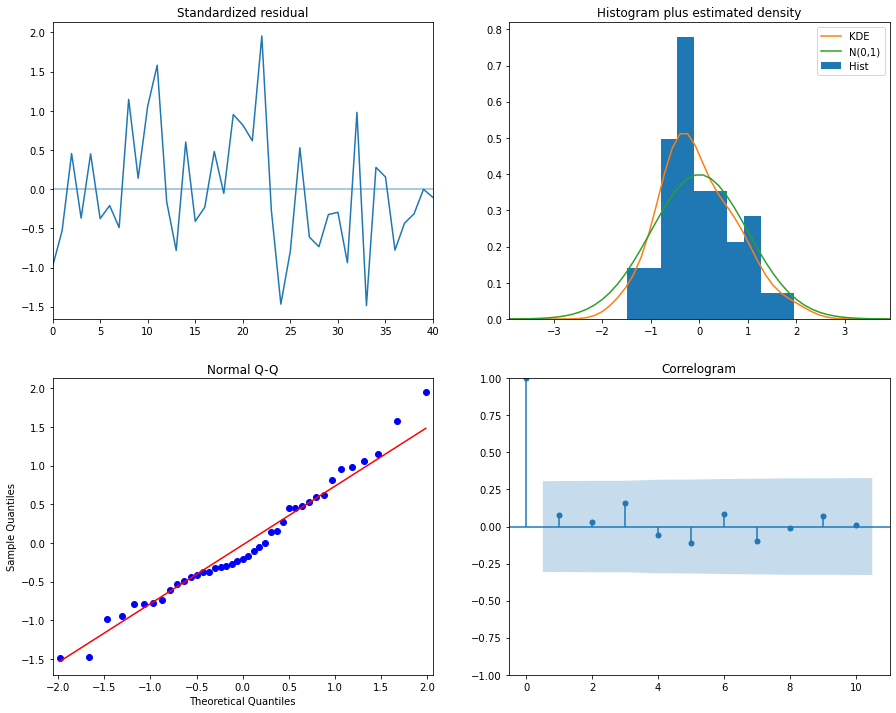

In [61]:
model_sarima_month.plot_diagnostics(figsize=(15,12))
plt.show()

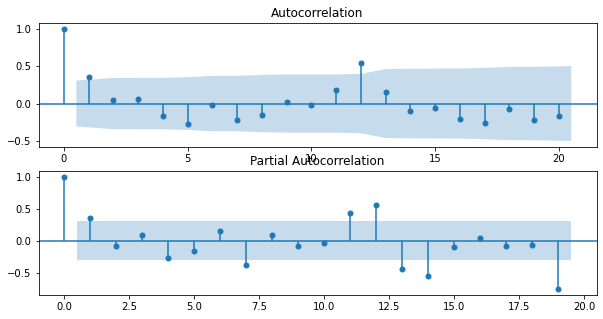

In [62]:
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(train_month, lags=20, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(train_month, lags=19, ax=ax[1])
plt.show()

In [72]:
n_pred = 19
fitted_month, confint_month = model_sarima_month.predict(n_periods=n_pred, return_conf_int=True)

In [73]:
# date = pd.date_range(train_month.index[-1], periods=n_pred, freq='MS')

In [74]:
date = pd.date_range(start='06/01/2019',end='31/12/2020', freq='MS')

In [75]:
date

DatetimeIndex(['2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [76]:
date_train = pd.date_range(start='01/01/2016', end='31/12/2019', freq='MS')

In [77]:
data_month2 = data_month.loc[:,'Sales']
data_month2 = data_month2.values

In [78]:
data_month2

array([ 18542.491 ,  22978.815 ,  51715.875 ,  38750.039 ,  56987.728 ,
        40344.534 ,  39261.963 ,  31115.3743,  73410.0249,  59687.745 ,
        79411.9658,  96999.043 ,  43971.374 ,  20301.1334,  58872.3528,
        36521.5361,  44261.1102,  52981.7257,  45264.416 ,  63120.888 ,
        87866.652 ,  77776.9232, 118447.825 ,  83829.3188,  14236.895 ,
         4519.892 ,  55691.009 ,  28295.345 ,  23648.287 ,  34595.1276,
        33946.393 ,  27909.4685,  81777.3508,  31453.393 ,  78628.7167,
        69545.6205,  18174.0756,  11951.411 ,  38726.252 ,  34195.2085,
        30131.6865,  24797.292 ,  28765.325 ,  36898.3322,  64595.918 ,
        31404.9235,  75972.5635,  74919.5212])

In [79]:
fitted_seri_month = pd.Series(fitted_month, index=date)
data_month3 = pd.Series(data_month2, index=date_train)

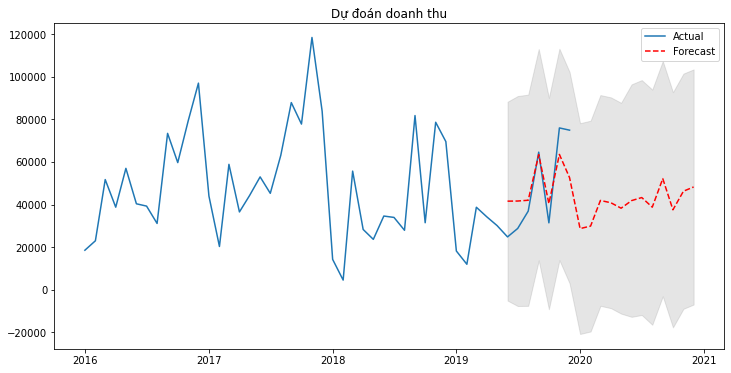

In [83]:
lower = confint_month[:, 0]
upper = confint_month[:, 1]

plt.figure(figsize = (12,6))
plt.plot(data_month3, label = 'Actual')
plt.plot(fitted_seri_month, color='red', linestyle='--', label = 'Forecast')
plt.fill_between(date, lower, upper, color = 'grey', alpha=0.2)
plt.legend()
plt.title('Dự đoán doanh thu')
plt.show()

In [81]:
def _measure_metric(y, y_hat):
    e = y-y_hat
    mse = np.mean(e**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(e))
    mape = np.mean(abs(e/y))
    
    print('Mean Square Error: {}'.format(mse))
    print('Root Mean Square Error: {}'.format(rmse))
    print('Mean Absolute Error: {}'.format(mae))
    print('Mean Square Percentage Error: {}'.format(mape))
    return mse, rmse, mae, mape

In [82]:
mse, rmse, mae, mape = _measure_metric(test_month.values[1], fitted_month)

Mean Square Error: 306314582.0053871
Root Mean Square Error: 17501.845102885214
Mean Absolute Error: 15078.603005473722
Mean Square Percentage Error: 0.5241937299673729
